In [1]:
import pandas as pd
df = pd.read_csv("C:\Covid19_Visuals\Data\covid_19_clean_complete.csv")

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Nilotpal Barman\AppData\Local\Temp\ipykernel_112\368560773.py:2: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("C:\Covid19_Visuals\Data\covid_19_clean_complete.csv")


In [2]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [3]:
print(df.head()) #Shows first five rows of the DataFrame
print(df.info()) #Display various info of dataset
print(df.columns) #Return a list of the column names
print(df.describe()) #Generates descriptive stats

  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0

In [4]:
df.isnull().sum() #Shows number of missing values in each column

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [5]:
#Fix Datatypes
df['Confirmed']=pd.to_numeric(df['Confirmed'], errors='coerce')
df['Date']=pd.to_datetime(df['Date'], errors='coerce')

In [6]:
df.drop_duplicates(inplace=True) #Removes duplicate values

In [7]:
df.columns=df.columns.str.strip() #removes leading and trailing spaces from all columns

In [8]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [9]:
#Top_countries with confirmed cases
top_countries=df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)
print(top_countries)

Country/Region
US                224345948
Brazil             89524967
Russia             45408411
India              40883464
Spain              27404045
United Kingdom     26748587
Italy              26745145
France             21210926
Germany            21059152
Iran               19339267
Name: Confirmed, dtype: int64


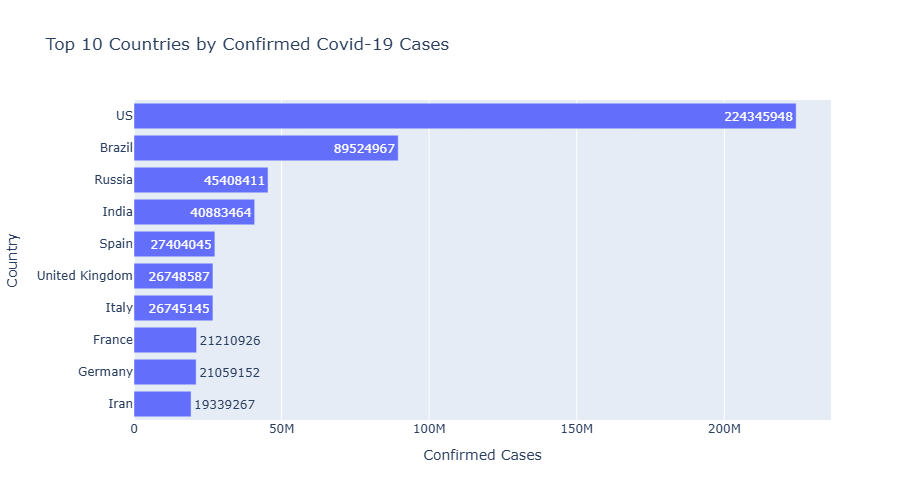

In [13]:
#Bar Plot
import plotly.express as px
import pandas as pd

# Group and get top 10
top_countries = df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10).reset_index()

# Create interactive bar chart
fig = px.bar(top_countries,
             x='Confirmed',
             y='Country/Region',
             orientation='h',
             title='Top 10 Countries by Confirmed Covid-19 Cases',
             labels={'Confirmed': 'Confirmed Cases', 'Country/Region': 'Country'},
             text='Confirmed')

# Customize hover text
fig.update_traces(hovertemplate='Country: %{y}<br>Confirmed: %{x}')

# Set figure size and reverse y-axis (so top country is at top)
fig.update_layout(
    width=800,
    height=500,
    yaxis=dict(autorange="reversed")
)

# Show the interactive chart
fig.show()


Text(0.5, 1.0, 'Total confirmed COVID-19 cases contributed by the top 5 countries compared to the rest of the world')

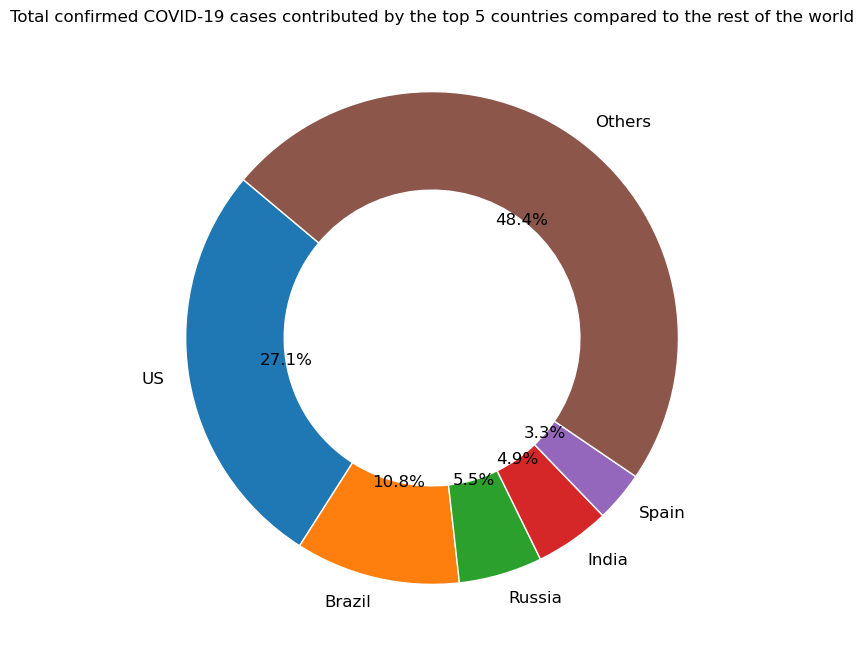

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample: Assuming you already have `df` loaded and cleaned

# Step 1: Group by country and get total confirmed cases
country_sums = df.groupby('Country/Region')['Confirmed'].sum()

# Step 2: Get top 5 countries, then sum the rest as 'Others'
top5 = country_sums.sort_values(ascending=False).head(5)
others = country_sums.drop(top5.index).sum()

# Step 3: Combine top5 + others
data = pd.concat([top5, pd.Series({'Others': others})])
labels = data.index
sizes = data.values

# Step 4: Plot pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.4, edgecolor='w'),  # makes it look like a donut
    textprops=dict(color="black", fontsize=12)
)
plt.title("Total confirmed COVID-19 cases contributed by the top 5 countries compared to the rest of the world")


In [18]:
# Replace with the actual column names in your dataset
deaths_by_country = df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False)
print(deaths_by_country)

Country/Region
US                11011411
United Kingdom     3997775
Brazil             3938034
Italy              3707717
France             3048524
                    ...   
Bhutan                   0
Mongolia                 0
Timor-Leste              0
Seychelles               0
Greenland                0
Name: Deaths, Length: 187, dtype: int64


In [20]:
top_10 = deaths_by_country.head(10)
print(top_10)

Country/Region
US                11011411
United Kingdom     3997775
Brazil             3938034
Italy              3707717
France             3048524
Spain              3033030
Mexico             1728277
India              1111831
Iran               1024136
Belgium             963679
Name: Deaths, dtype: int64


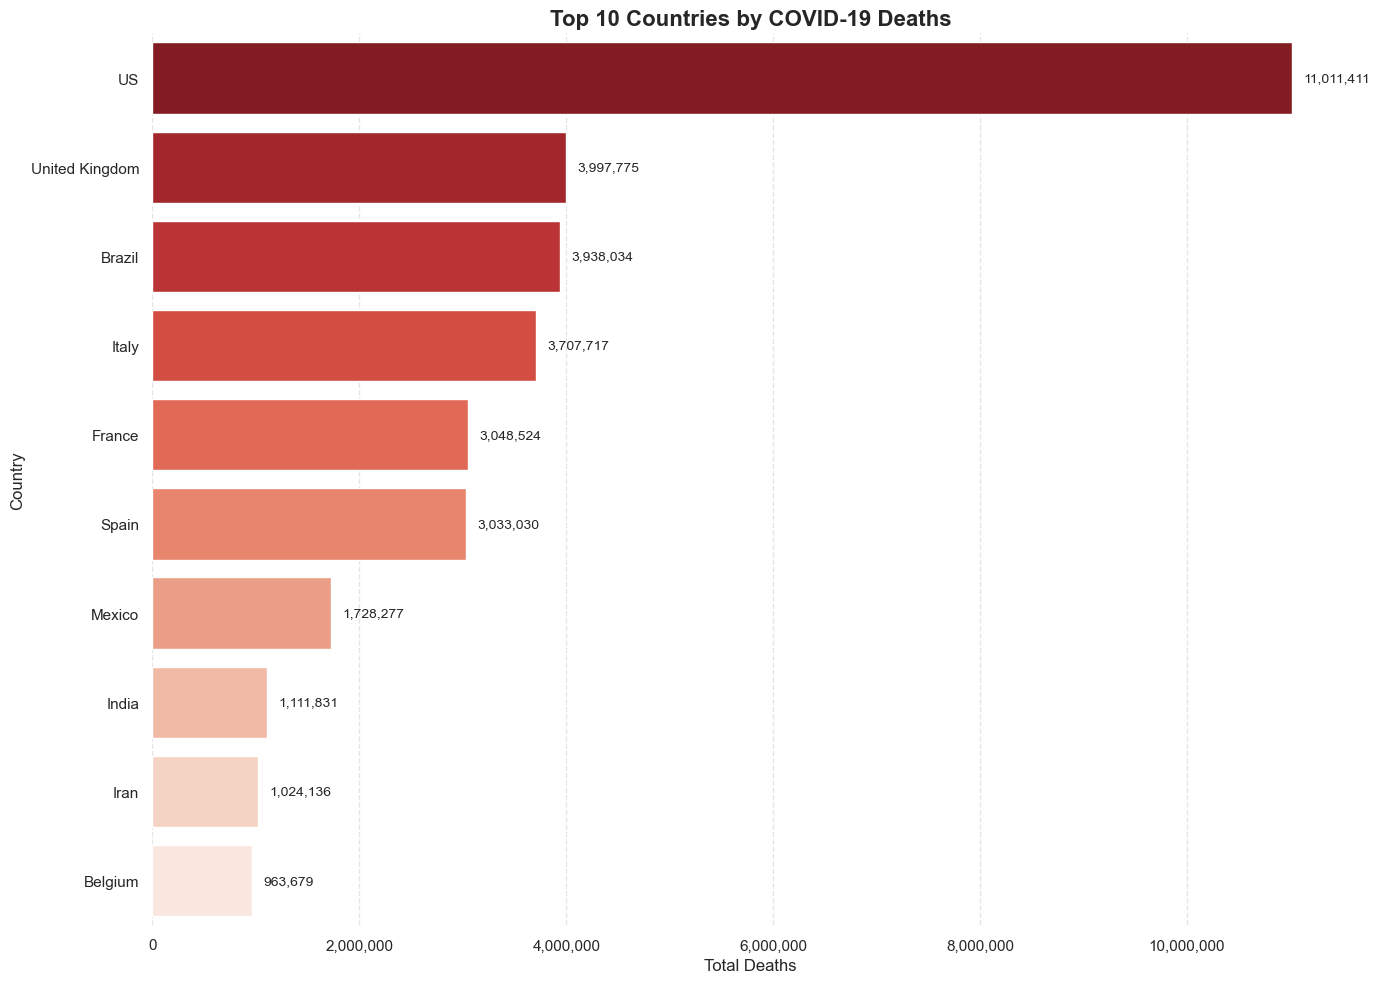

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group and get top 10 countries by total deaths
top_10 = df.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10).reset_index()

# Step 2: Sort in ascending order for horizontal barplot (top country at bottom)
top_10 = top_10.sort_values(by='Deaths', ascending=False)

# Step 3: Set seaborn theme
sns.set_theme(style="whitegrid")

# Step 4: Plot
plt.figure(figsize=(14, len(top_10) * 1.0))  # 1.0 gives ~1 inch per bar
barplot = sns.barplot(
    data=top_10,
    x='Deaths',
    y='Country/Region',
    hue='Country/Region',          # Fix for future warning
    palette='Reds_r',
    legend=False                   # Hide the redundant legend
)


# Step 5: Add value labels on bars
for i, value in enumerate(top_10['Deaths']):
    plt.text(value + top_10['Deaths'].max() * 0.01, i, f"{int(value):,}", va='center', fontsize=10)

# Step 6: Customize appearance
plt.title('Top 10 Countries by COVID-19 Deaths', fontsize=16, fontweight='bold')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [32]:
# Replace with the actual column names in your dataset
most_recovered = df.groupby('Country/Region')['Recovered'].sum().sort_values(ascending=False)
print(most_recovered)

Country/Region
US             56353416
Brazil         54492873
Russia         25120448
India          23783720
Germany        17107839
                 ...   
Timor-Leste           0
Mozambique            0
Syria                 0
Sweden                0
Canada                0
Name: Recovered, Length: 187, dtype: int64


In [33]:
top_5_recoveries=most_recovered.head(5)
print(top_5_recoveries)

Country/Region
US         56353416
Brazil     54492873
Russia     25120448
India      23783720
Germany    17107839
Name: Recovered, dtype: int64


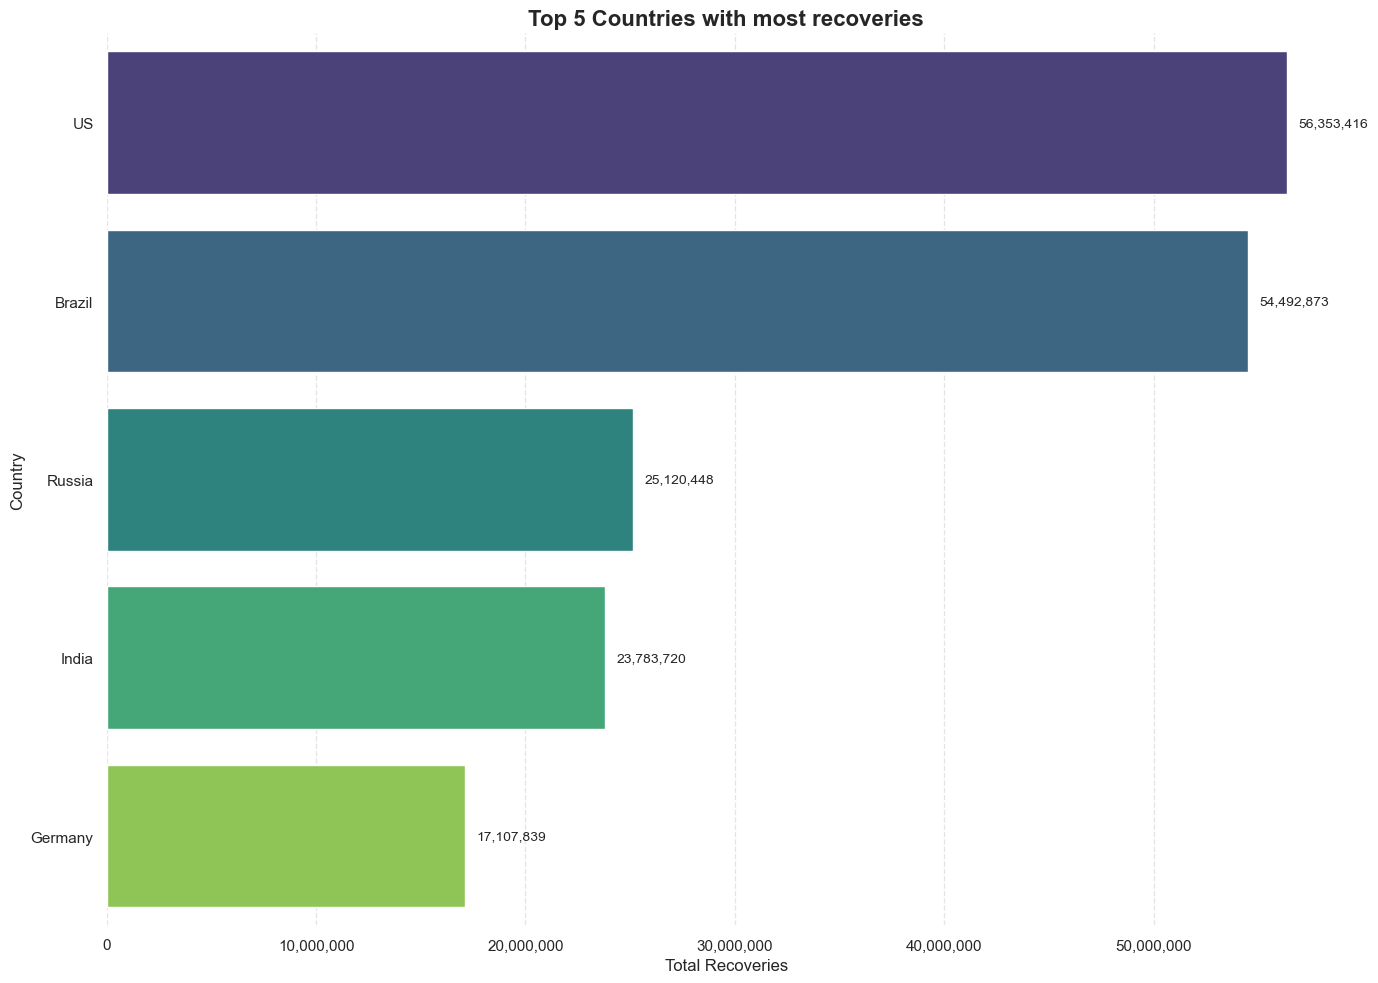

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group and get top 10 countries by total deaths
top_5_recoveries= df.groupby('Country/Region')['Recovered'].sum().sort_values(ascending=False).head(5).reset_index()

# Step 2: Sort in ascending order for horizontal barplot (top country at bottom)
top_5_recoveries = top_5_recoveries.sort_values(by='Recovered', ascending=False)

# Step 3: Set seaborn theme
sns.set_theme(style="whitegrid")

# Step 4: Plot
plt.figure(figsize=(14, len(top_10) * 1.0))  # 1.0 gives ~1 inch per bar
barplot = sns.barplot(
    data=top_5_recoveries,
    x='Recovered',
    y='Country/Region',
    hue='Country/Region',          # Fix for future warning
    palette='viridis',
    legend=False                   # Hide the redundant legend
)


# Step 5: Add value labels on bars
for i, value in enumerate(top_5_recoveries['Recovered']):
    plt.text(value + top_5_recoveries['Recovered'].max() * 0.01, i, f"{int(value):,}", va='center', fontsize=10)

# Step 6: Customize appearance
plt.title('Top 5 Countries with most recoveries', fontsize=16, fontweight='bold')
plt.xlabel('Total Recoveries')
plt.ylabel('Country')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


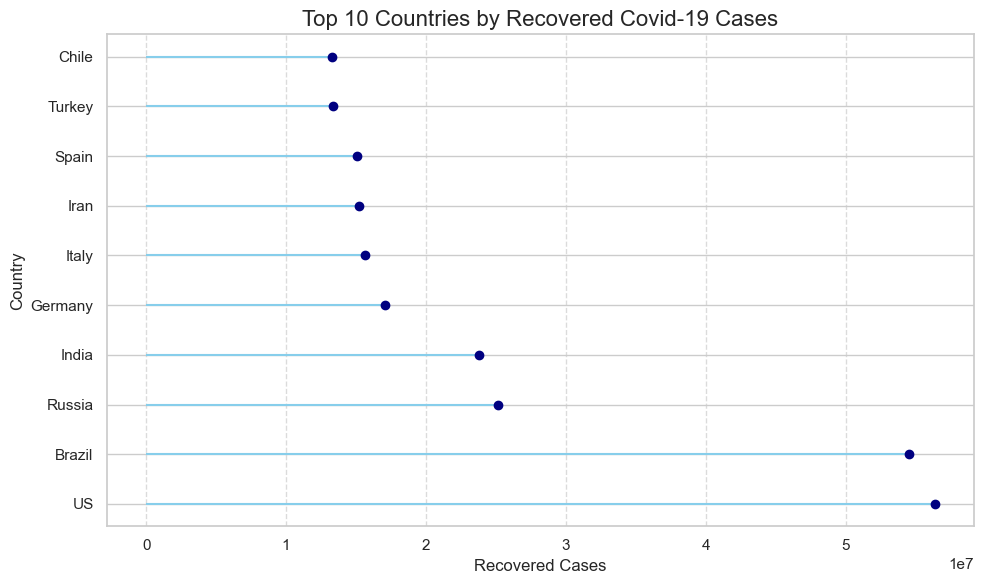

In [41]:
#Recovered cases with Lollipop Chart
import matplotlib.pyplot as plt
import pandas as pd

# Assuming top_recovered is a DataFrame with top 10 recovered countries
top_recovered = df.groupby('Country/Region')['Recovered'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 6))
plt.hlines(y=top_recovered['Country/Region'], xmin=0, xmax=top_recovered['Recovered'], color='skyblue')
plt.plot(top_recovered['Recovered'], top_recovered['Country/Region'], "o", color='navy')

plt.title("Top 10 Countries by Recovered Covid-19 Cases", fontsize=16)
plt.xlabel("Recovered Cases")
plt.ylabel("Country")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


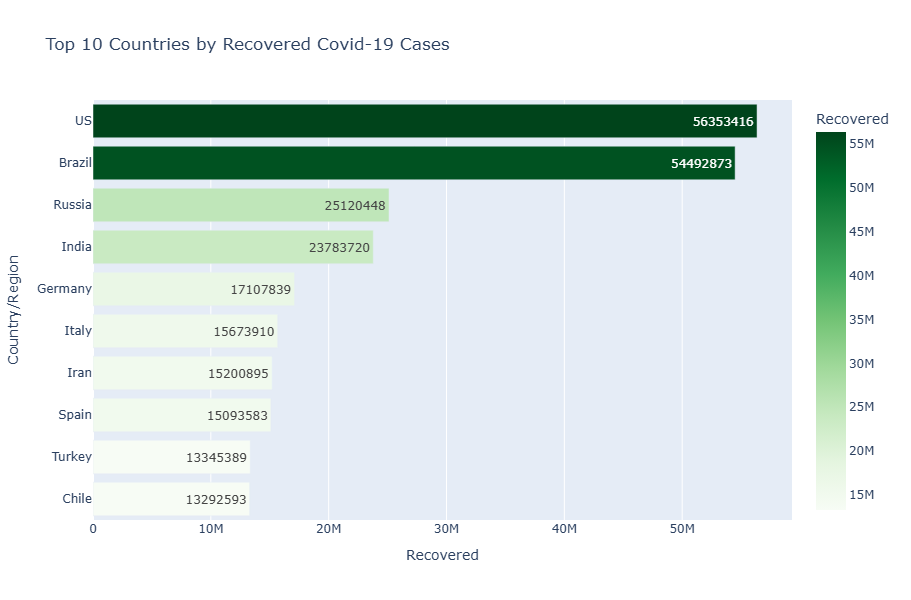

In [42]:
#Recovered Cases with plotlyy
import plotly.express as px

fig = px.bar(
    top_recovered,
    x='Recovered',
    y='Country/Region',
    orientation='h',
    title='Top 10 Countries by Recovered Covid-19 Cases',
    text='Recovered',
    color='Recovered',
    color_continuous_scale='greens'
)
fig.update_layout(yaxis=dict(autorange="reversed"), height=600)
fig.show()
